Evaluate simple linear regression¶

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [7]:
data = pd.read_csv("marketing_sales_data.csv")
data.head(10)
data.shape

(572, 5)

In [8]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


Explore the independent variables


There are three continuous independent variables: TV, Radio, and Social_Media. To understand how heavily the business invests in each promotion type, use describe() to generate descriptive statistics for these three variables.

In [13]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social Media']].describe()

,Radio,Social Media
count,572.000000,572.000000
mean,17.520616,3.333803
std,9.290933,2.238378
min,0.109106,0.000031
25%,10.699556,1.585549
50%,17.149517,3.150111
75%,24.606396,4.730408
max,42.271579,11.403625


Explore the dependent variable

Before fitting the model, ensure the Sales for each promotion (i.e., row) is present. If the Sales in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the Sales column in the DataFrame data.

In [14]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.0%


In [15]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

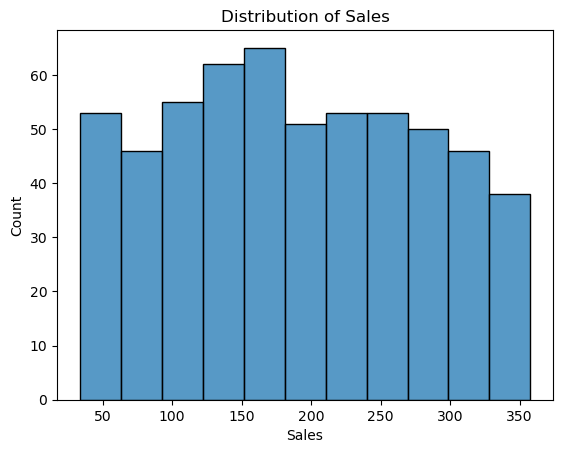

In [16]:

fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with Sales. This will help you select the X variable for the simple linear regression.

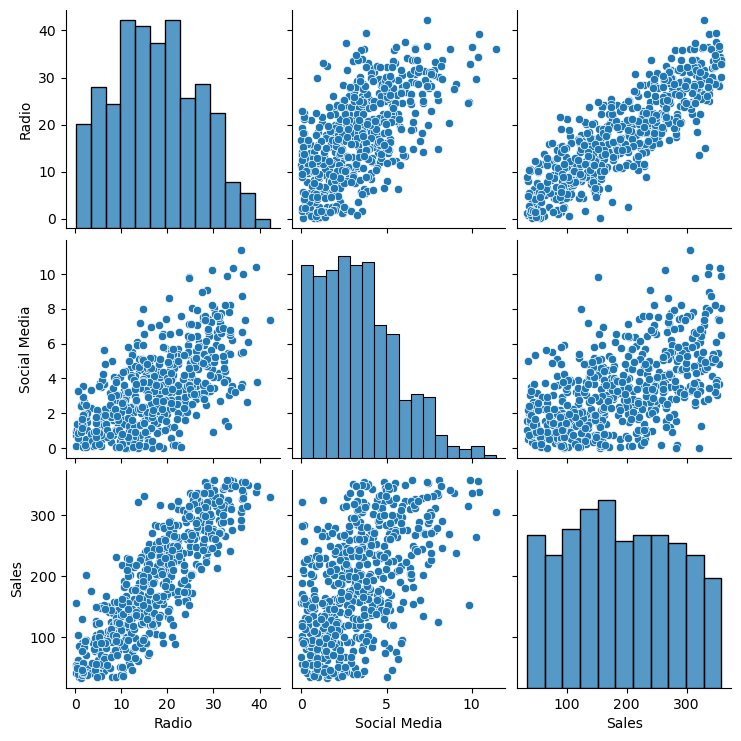

In [18]:
# Create a pairplot of the data.

sns.pairplot(data);

Build and fit the model

Replace the comment with the correct code. Use the variable you chose for X for building the model.

In [19]:
# Define the OLS formula.
ols_formula = 'Sales ~ Radio'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          4.38e-167
Time:                        21:03:36   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

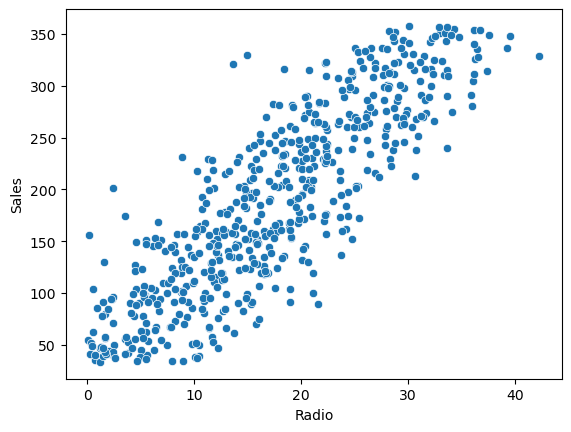

In [20]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = data['Radio'], y = data['Sales']);

Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

Plot 1: Histogram of the residuals
Plot 2: Q-Q plot of the residuals

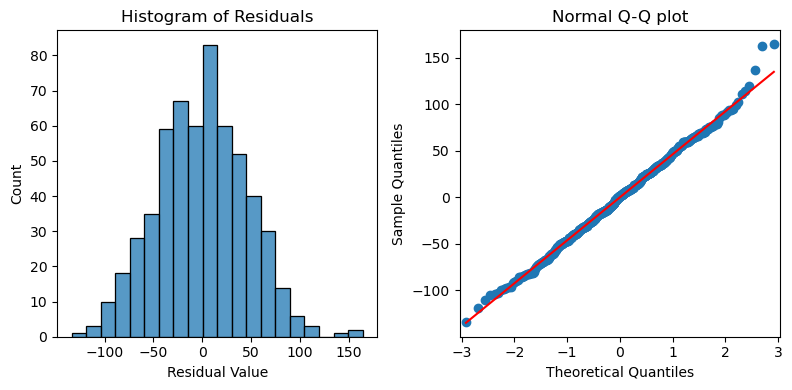

In [21]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

Model assumption: Homoscedasticity

The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at 𝑦=0
 to visualize the variance of residuals above and below 𝑦=0

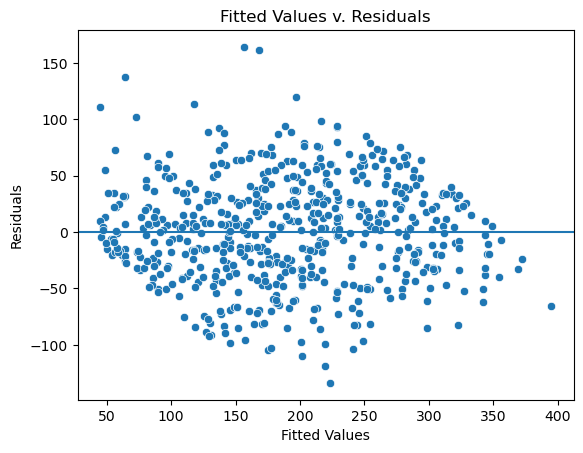

In [22]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

In [23]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          4.38e-167
Time:                        21:03:36   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When Radio is used as the independent variable, it has a p-value of  0.000
  and a  95%
  confidence interval of  [7.891,8.709]
 . This means there is a  95%
  chance the interval  [7.891,8.709]
  contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact Radio has on Sales.